# Clustering Penguins dataset using SOM

The Penguins dataset is a popular dataset in the data science community that contains information on the size, sex, and species of penguins.

The dataset consists of 344 observations collected from 3 islands in the Palmer Archipelago, Antarctica. It includes the following 7 variables:

* species: The species of penguin (Adelie, Chinstrap, or Gentoo).
* island: The island where the penguin was observed (Biscoe, Dream, or Torgersen).
* bill_length_mm: The length of the penguin's bill in millimeters.
* bill_depth_mm: The depth of the penguin's bill in millimeters.
* flipper_length_mm: The length of the penguin's flipper in millimeters.
* body_mass_g: The mass of the penguin's body in grams.
* sex: The sex of the penguin (male or female).

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Load the Penguins dataset

In [2]:
# Load the Penguins dataset
penguins = sns.load_dataset("penguins")

# Drop missing values
penguins.dropna(inplace=True)

# Separate features and labels
features = penguins.drop(columns='species')
labels = penguins['species']
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


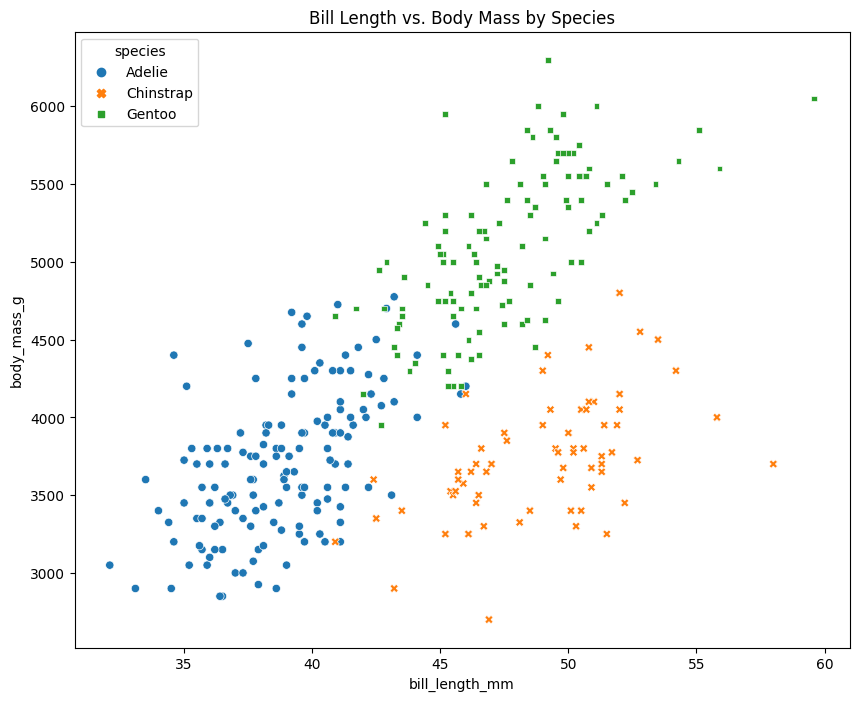

In [3]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', style="species")
plt.title('Bill Length vs. Body Mass by Species')
plt.show()

### Create a preprocessing pipeline

<a href="https://github.com/JustGlowing/minisom">MiniSom</a> is a minimalistic and Numpy based implementation of the Self Organizing Maps (SOM)

In [4]:
# !pip install minisom

In [5]:
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
numeric_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
categorical_features = ['island', 'sex']

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

features_preprocessed = preprocessor.fit_transform(features)

# Initialize and train the SOM
som = MiniSom(7, 7, features_preprocessed.shape[1], sigma=0.5, learning_rate=0.5)
som.train_random(features_preprocessed, 500)

# Use the trained SOM to classify the data
winning_neurons = np.array([som.winner(x) for x in features_preprocessed])
clustered = pd.DataFrame(winning_neurons, columns=['x', 'y'])
clustered['label'] = labels.reset_index(drop=True)

In [7]:
clustered

,x,y,label
0,2,5,Adelie
1,6,2,Adelie
2,6,2,Adelie
3,6,2,Adelie
4,3,5,Adelie
...,...,...,...
328,6,5,Gentoo
329,6,5,Gentoo
330,0,0,Gentoo
331,6,5,Gentoo


### Visualize the results

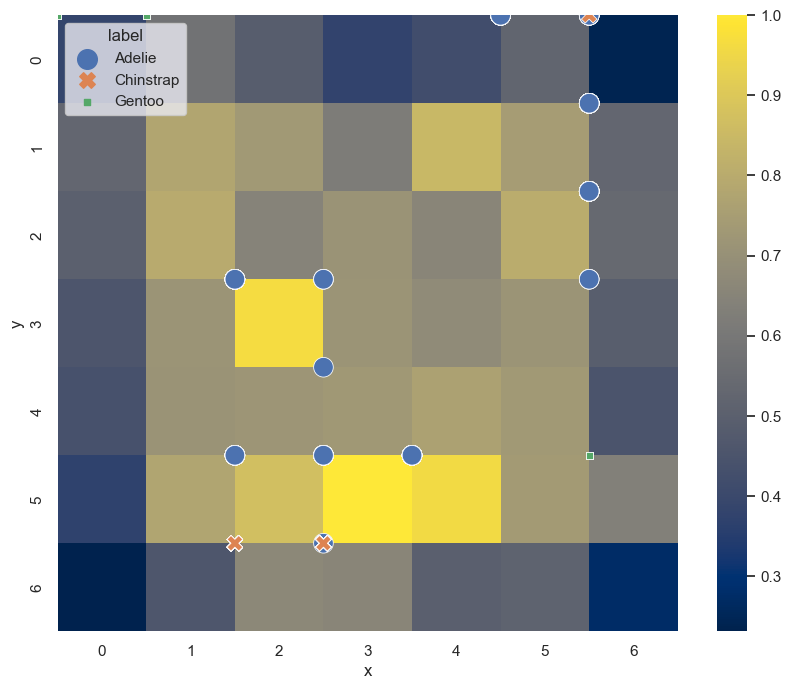

In [8]:
# Use the SOM to visualize the dataset
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(som.distance_map().T, cmap='cividis')
sns.scatterplot(data=clustered, x='x', y='y', hue='label', size="label", sizes=(50, 200),  style="label")
plt.savefig('som.png', dpi=300)